## Trading Strategies

### Simple moving averages (SMA) based strategies

A signal is derived, for example, when an SMA defined on a shorter time window—say 42 days—crosses an SMA defined on a longer time window—say 252 days.

### Momentum strategies

These are strategies that arex based on the hypothesis that recent performance will persist for some additional time.

### Mean-reversion strategies

The reasoning behind mean-reversion strategies is that stock prices or prices of other financial instruments tend to revert to some mean level or to some trend level when they have deviated too much from such levels.

## Making Use of Vectorization




In [1]:
v = [1, 2, 3, 4, 5]

In [2]:
sm = [2 * i for i in v]
sm

[2, 4, 6, 8, 10]

In [3]:
# doesn't work as expected with the stdlib
2 * v

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

### Vectorization with NumPy

In [4]:
import numpy as np

In [5]:
a = np.array(v)
a

array([1, 2, 3, 4, 5])

In [6]:
type(a)

numpy.ndarray

In [7]:
# works as expected with NumPy
2 * a

array([ 2,  4,  6,  8, 10])

In [8]:
# multi-dimensional arrays:

a = np.arange(12).reshape((4, 3))
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [9]:
2 * a

array([[ 0,  2,  4],
       [ 6,  8, 10],
       [12, 14, 16],
       [18, 20, 22]])

In [10]:
a.mean()

5.5

In [11]:
a.mean(axis=0)

array([4.5, 5.5, 6.5])

### Vectorization with pandas

In [12]:
a = np.arange(15).reshape(5, 3)
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [13]:
import pandas as pd

In [14]:
columns = list('abc')
columns

['a', 'b', 'c']

In [15]:
index = pd.date_range('2021-7-1', periods=5, freq='B')
index

DatetimeIndex(['2021-07-01', '2021-07-02', '2021-07-05', '2021-07-06',
               '2021-07-07'],
              dtype='datetime64[ns]', freq='B')

In [16]:
df = pd.DataFrame(a, columns=columns, index=index)
df

,a,b,c
2021-07-01,0,1,2
2021-07-02,3,4,5
2021-07-05,6,7,8
2021-07-06,9,10,11
2021-07-07,12,13,14


In [17]:
# works similarly to NumPy, with the difference being aggregation is done column-wise
2 * df

,a,b,c
2021-07-01,0,2,4
2021-07-02,6,8,10
2021-07-05,12,14,16
2021-07-06,18,20,22
2021-07-07,24,26,28


In [18]:
df.sum()

a    30
b    35
c    40
dtype: int64

In [19]:
np.mean(df)

/home/mlopez/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


a    6.0
b    7.0
c    8.0
dtype: float64

In [20]:
df['a'] + df['c']

2021-07-01     2
2021-07-02     8
2021-07-05    14
2021-07-06    20
2021-07-07    26
Freq: B, dtype: int64

In [21]:
# boolean conditions
df['a'] > 5

2021-07-01    False
2021-07-02    False
2021-07-05     True
2021-07-06     True
2021-07-07     True
Freq: B, Name: a, dtype: bool

In [22]:
df[df['a'] > 5]

,a,b,c
2021-07-05,6,7,8
2021-07-06,9,10,11
2021-07-07,12,13,14


In [23]:
df['c'] > df['b']

2021-07-01    True
2021-07-02    True
2021-07-05    True
2021-07-06    True
2021-07-07    True
Freq: B, dtype: bool

## Strategies Based on Simple Moving Averages

### Getting into the Basics

In [24]:
raw = pd.read_csv('../data/pyalgo_eikon_eod_data.csv', index_col=0, parse_dates=True).dropna()
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [25]:
data = pd.DataFrame(raw["EUR="])

In [26]:
data.rename(columns={'EUR=': 'price'}, inplace=True)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2516 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


In [28]:
data['SMA1'] = data['price'].rolling(42).mean()

In [29]:
data['SMA2'] = data['price'].rolling(252).mean()

In [30]:
data.tail()

,price,SMA1,SMA2
Date,,,
2019-12-24,1.1087,1.107698,1.119630
2019-12-26,1.1096,1.107740,1.119529
2019-12-27,1.1175,1.107924,1.119428
2019-12-30,1.1197,1.108131,1.119333
2019-12-31,1.1210,1.108279,1.119231


In [31]:
%matplotlib inline
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

/tmp/ipykernel_54220/1427899056.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Axes: xlabel='Date'>

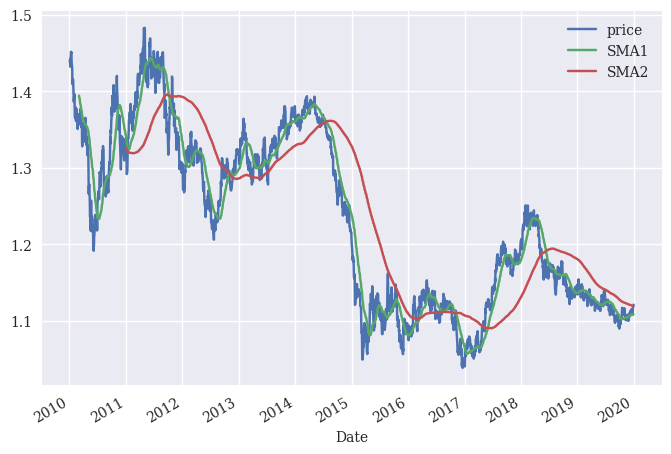

In [32]:
data.plot()

In [33]:
data['position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
data.tail()

,price,SMA1,SMA2,position
Date,,,,
2019-12-24,1.1087,1.107698,1.119630,-1
2019-12-26,1.1096,1.107740,1.119529,-1
2019-12-27,1.1175,1.107924,1.119428,-1
2019-12-30,1.1197,1.108131,1.119333,-1
2019-12-31,1.1210,1.108279,1.119231,-1


In [34]:
data.dropna(inplace=True)

<Axes: xlabel='Date'>

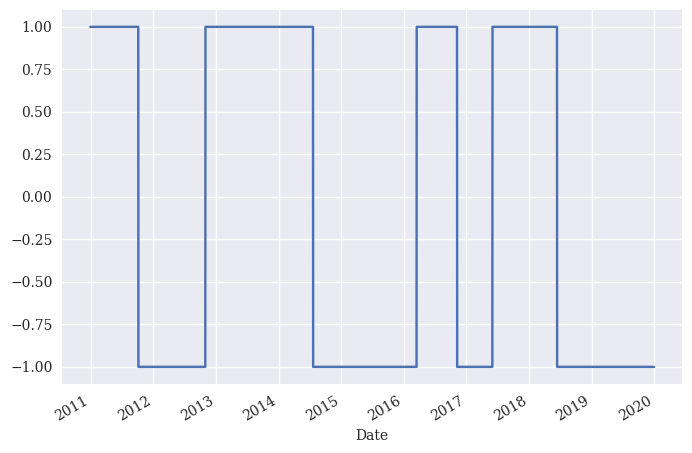

In [35]:
data['position'].plot(ylim=[-1.1, 1.1])

In [36]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))

<Axes: >

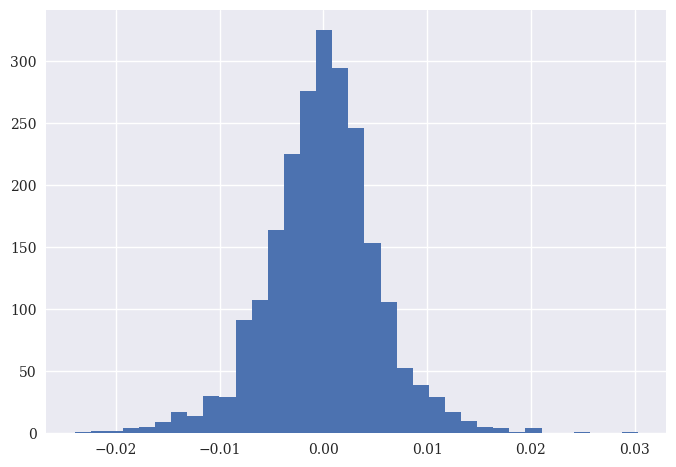

In [37]:
data['returns'].hist(bins=35)

In [38]:
data['strategy'] = data['position'].shift(1) * data['returns']

In [39]:
data[['returns', 'strategy']].sum()

returns    -0.176731
strategy    0.253121
dtype: float64

In [40]:
data[['returns', 'strategy']].sum().apply(np.exp)

returns     0.838006
strategy    1.288039
dtype: float64

<Axes: xlabel='Date'>

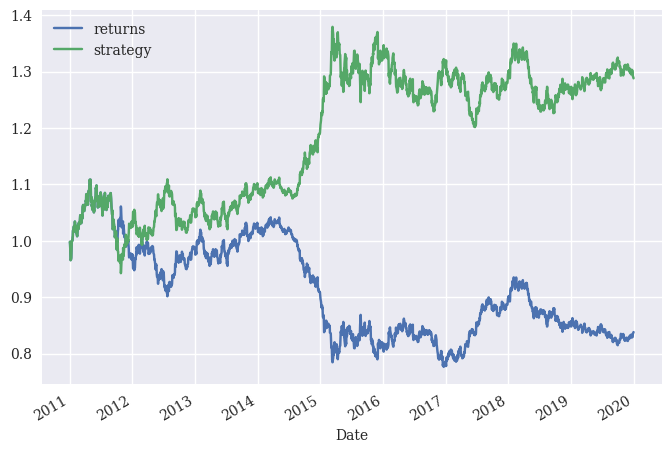

In [41]:
data[['returns', 'strategy']].cumsum().apply(np.exp).plot()

In [42]:
data[['returns', 'strategy']].mean() * 252

returns    -0.019671
strategy    0.028174
dtype: float64

In [43]:
np.exp(data[['returns', 'strategy']].mean() * 252) - 1

returns    -0.019479
strategy    0.028575
dtype: float64

In [44]:
data[['returns', 'strategy']].std() * 252 ** 0.5

returns     0.085414
strategy    0.085405
dtype: float64

In [45]:
(data[['returns', 'strategy']].apply(np.exp) - 1).std() * 252 ** 0.5

returns     0.085405
strategy    0.085373
dtype: float64

In [46]:
data['cumret'] = data['strategy'].cumsum().apply(np.exp)

In [47]:
data['cummax'] = data['cumret'].cummax()

<Axes: xlabel='Date'>

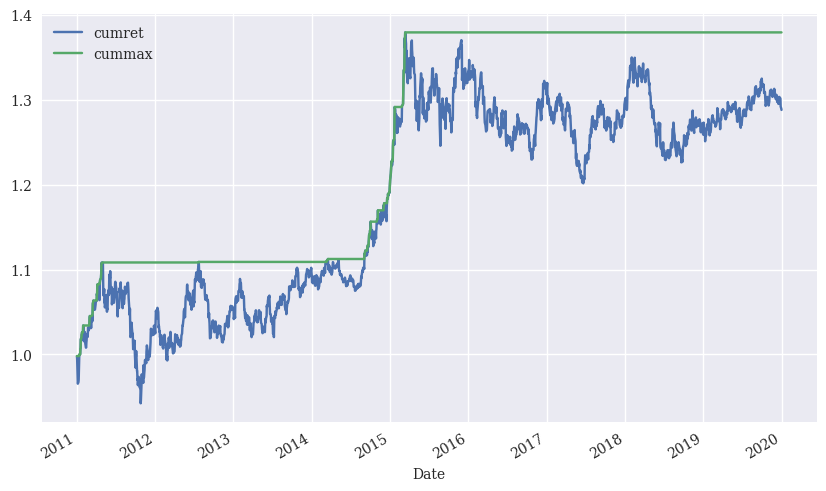

In [48]:
data[['cumret', 'cummax']].dropna().plot(figsize=(10, 6))

In [49]:
drawdown = data['cummax'] - data['cumret']
drawdown.max()

0.17779367070195895

In [50]:
temp = drawdown[drawdown == 0]
periods = (temp.index[1:].to_pydatetime() - temp.index[:-1].to_pydatetime())
periods[12:15]

array([datetime.timedelta(days=1), datetime.timedelta(days=1),
       datetime.timedelta(days=10)], dtype=object)

In [51]:
periods.max()

datetime.timedelta(days=596)

## Generalizing the Approach

In [52]:
import sma_vector_backtester as SMA

smabt = SMA.SMAVectorBacktester('EUR=', 42, 252, '2010-1-1', '2019-12-31')

In [53]:
smabt.run_strategy()

(1.29, 0.45)

In [54]:
%time

smabt.optimize_parameters((30, 50, 2), (200, 300, 2))

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.58 µs


(array([ 48., 238.]), 1.5)

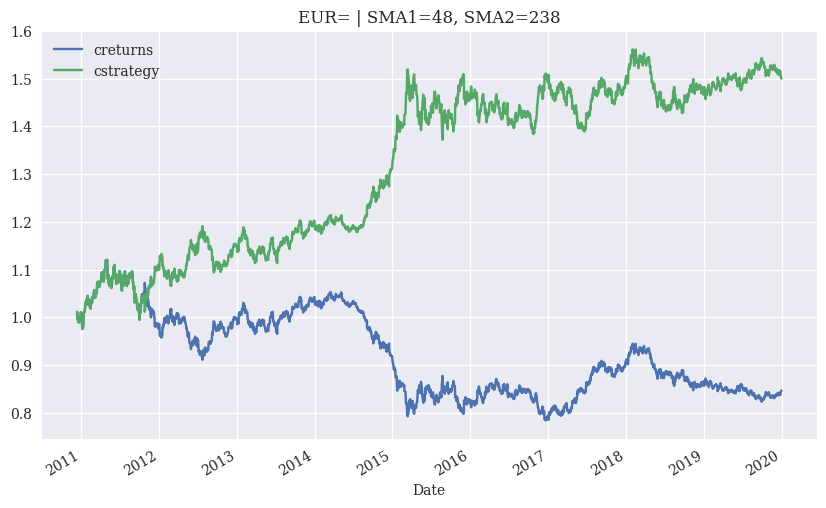

In [55]:
smabt.plot_results()

## Strategies Based on Momentum

There are two basic types of momentum strategies:

The first type is cross-sectional momentum strategies. Selecting from a larger pool of instruments, these strategies buy those instruments that have recently outperformed relative to their peers (or a benchmark) and sell those instruments that have underperformed. The basic idea is that the instruments continue to outperform and underperform, respectively—at least for a certain period of time. 

The second type is time series momentum strategies. These strategies buy those instruments that have recently performed well and sell those instruments that have recently performed poorly. In this case, the benchmark is the past returns of the instrument itself.

### Getting into the Basics

In [56]:
data = pd.DataFrame(raw['XAU='])

In [57]:
data.rename(columns={'XAU=': 'price'}, inplace=True)

In [58]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))

In [59]:
data['position'] = np.sign(data['returns'])

In [60]:
data['strategy'] = data['position'].shift(1) * data['returns']

<Axes: xlabel='Date'>

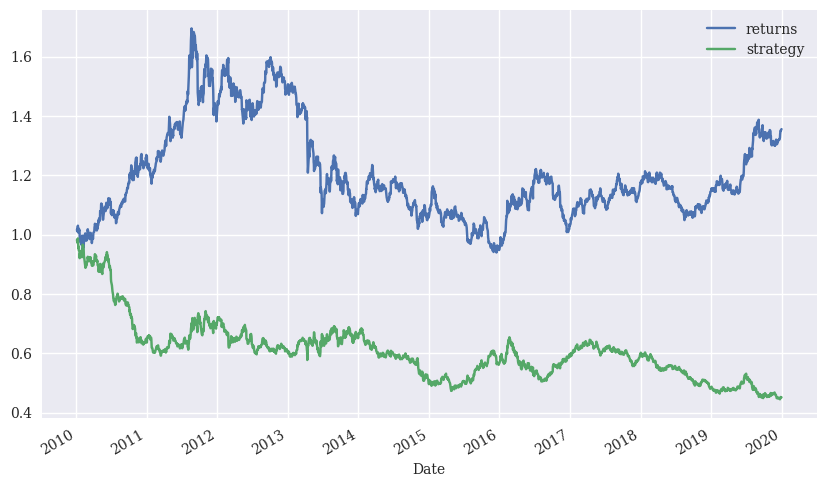

In [61]:
data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6))

In [62]:
data['position'] = np.sign(data['returns'].rolling(3).mean())

In [63]:
data['strategy'] = data['position'].shift(1) * data['returns']

<Axes: xlabel='Date'>

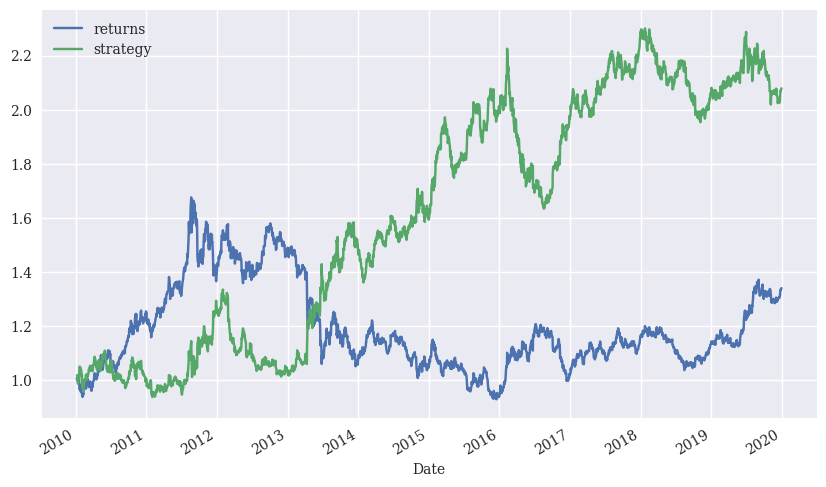

In [64]:
data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6))

In [65]:
fn = '../data/AAPL_1min_05052020.csv'

In [66]:
data = pd.read_csv(fn, index_col=0, parse_dates=True)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 241 entries, 2020-05-05 16:00:00 to 2020-05-05 20:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HIGH    241 non-null    float64
 1   LOW     241 non-null    float64
 2   OPEN    241 non-null    float64
 3   CLOSE   241 non-null    float64
 4   COUNT   241 non-null    float64
 5   VOLUME  241 non-null    float64
dtypes: float64(6)
memory usage: 13.2 KB


In [68]:
data['returns'] = np.log(data['CLOSE'] / data['CLOSE'].shift(1))

In [69]:
to_plot = ['returns']

for m in [1, 3, 5, 7, 9]:
    data['position_%d' % m] = np.sign(data['returns'].rolling(m).mean())
    data['strategy_%d' % m] = (data['position_%d' % m].shift(1) * data['returns'])
    to_plot.append('strategy_%d' % m)

<Axes: title={'center': 'AAPL intraday 05. May 2020'}, xlabel='Date'>

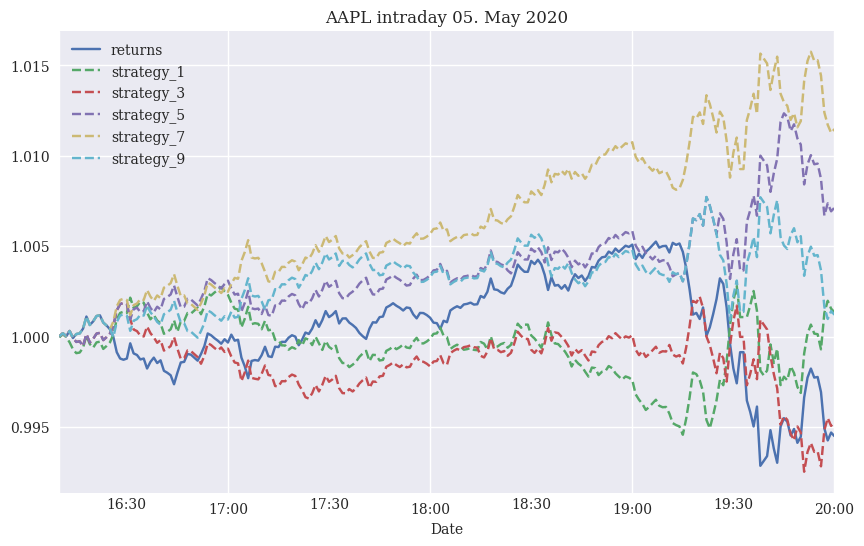

In [70]:
data[to_plot].dropna().cumsum().apply(np.exp).plot(title='AAPL intraday 05. May 2020', figsize=(10, 6), style=['-', '--', '--', '--', '--', '--'])

### Generalizing the Approach

In [71]:
import mom_vector_backtester as Mom

mombt = Mom.MomVectorBacktester('XAU=', '2010-1-1', '2019-12-31', 10000, 0.0)

In [72]:
mombt.run_strategy(momentum=3)

(20797.87, 7395.53)

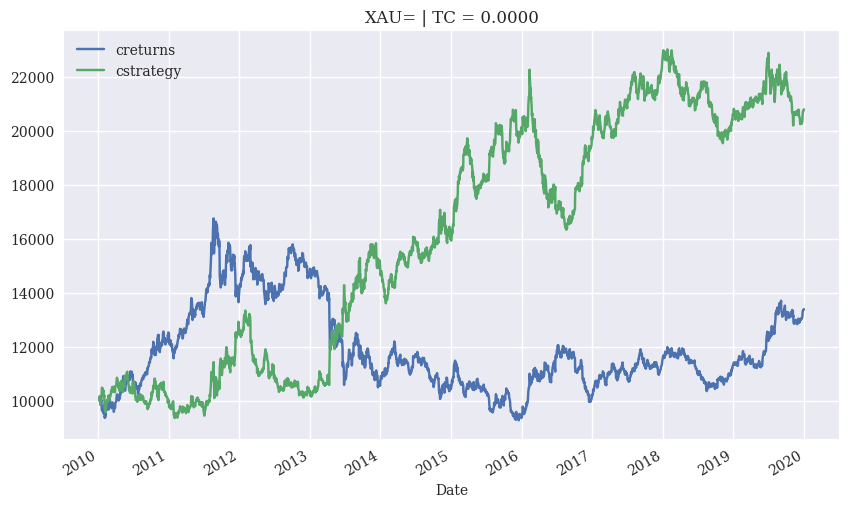

In [73]:
mombt.plot_results()

In [74]:
mombt = Mom.MomVectorBacktester('XAU=', '2010-1-1', '2019-12-31', 10000, 0.001)

In [75]:
mombt.run_strategy(momentum=3)

(10749.4, -2652.93)

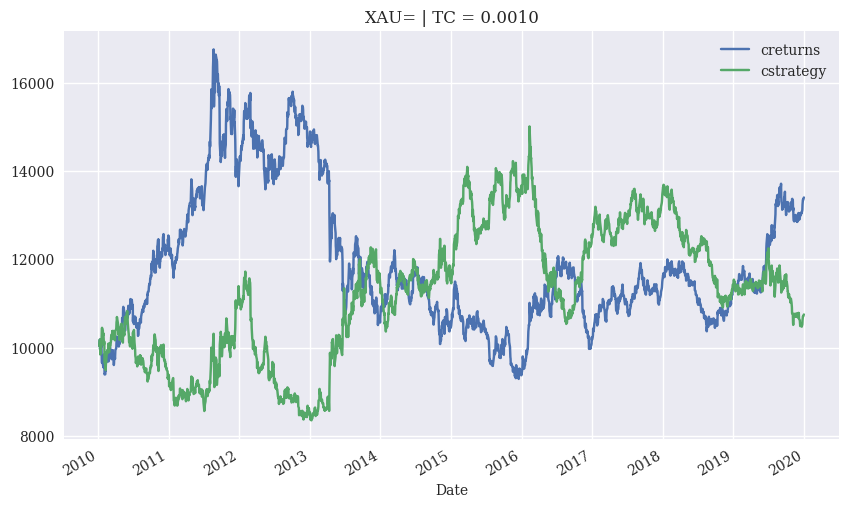

In [76]:
mombt.plot_results()

## Strategies Based on Mean Reversion

Roughly speaking, mean-reversion strategies rely on a reasoning that is the opposite of momentum strategies. If a financial instrument has performed “too well” relative to its trend, it is shorted, and vice versa.

The idea is to define a threshold for the distance between the current stock price and the SMA, which signals a long or short position.

### Getting into the Basics

In [77]:
data = pd.DataFrame(raw['GDX'])

In [78]:
data.rename(columns={'GDX': 'price'}, inplace=True)

In [79]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))

<Axes: xlabel='Date'>

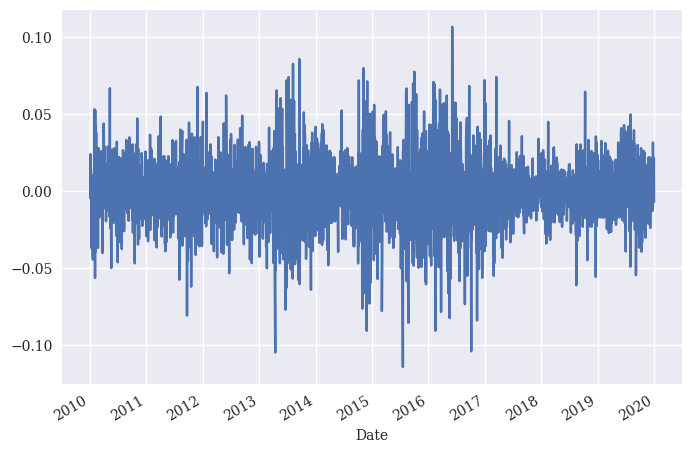

In [80]:
data["returns"].plot()

In [81]:
SMA = 25

In [82]:
data['SMA'] = data['price'].rolling(SMA).mean()

In [83]:
threshold = 3.5

In [84]:
data['distance'] = data['price'] - data['SMA']

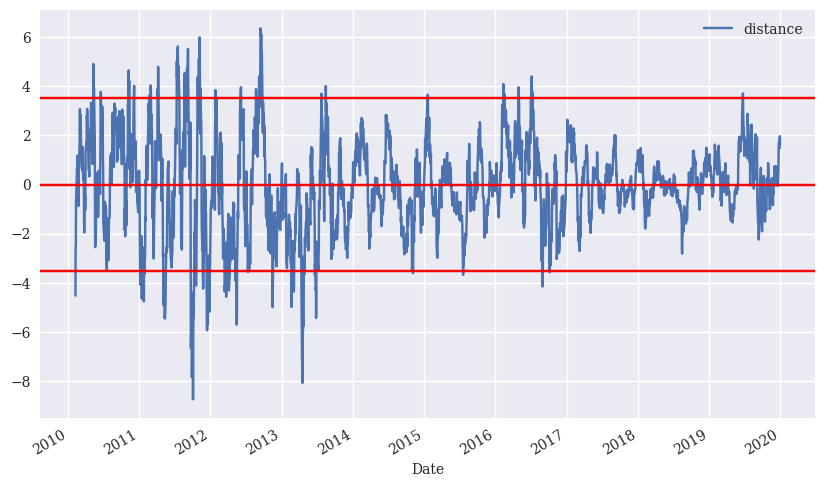

In [85]:
data['distance'].dropna().plot(figsize=(10, 6), legend=True)
plt.axhline(threshold, color='r')
plt.axhline(-threshold, color='r')
plt.axhline(0, color='r')

In [86]:
data['position'] = np.where(data['distance'] > threshold, -1, np.nan)

In [87]:
data['position'] = np.where(data['distance'] < -threshold, 1, data['position'])

In [88]:
data['position'] = np.where(data['distance'] * data['distance'].shift(1) < 0, 0, data['position'])

In [89]:
data['position'] = data['position'].ffill().fillna(0)

<Axes: xlabel='Date'>

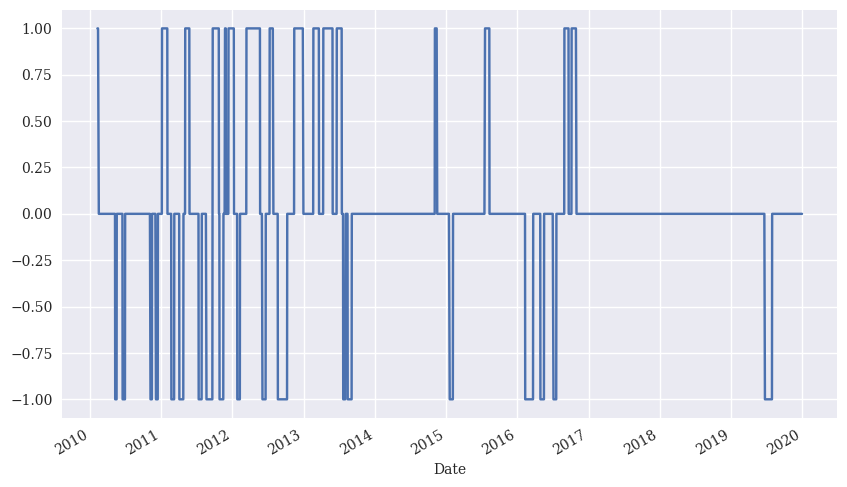

In [90]:
data['position'].iloc[SMA:].plot(ylim=[-1.1, 1.1], figsize=(10, 6))

In [91]:
data['strategy'] = data['position'].shift(1) * data['returns']

<Axes: xlabel='Date'>

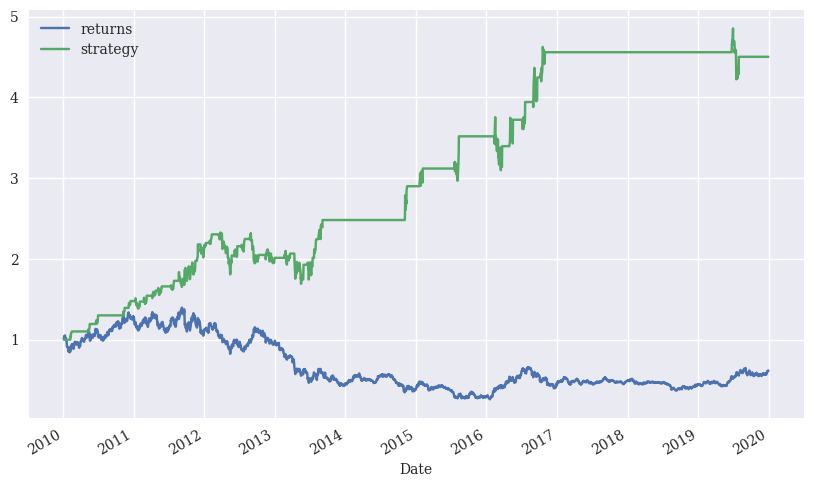

In [92]:
data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6))

### Generalizing the Approach

In [93]:
import mr_vector_backtester as MR

In [94]:
mrbt = MR.MRVectorBacktester('GLD', '2010-1-1', '2019-12-31', 10000, 0.001)

In [95]:
mrbt.run_strategy(SMA=43, threshold=7.5)

(13542.15, 646.21)

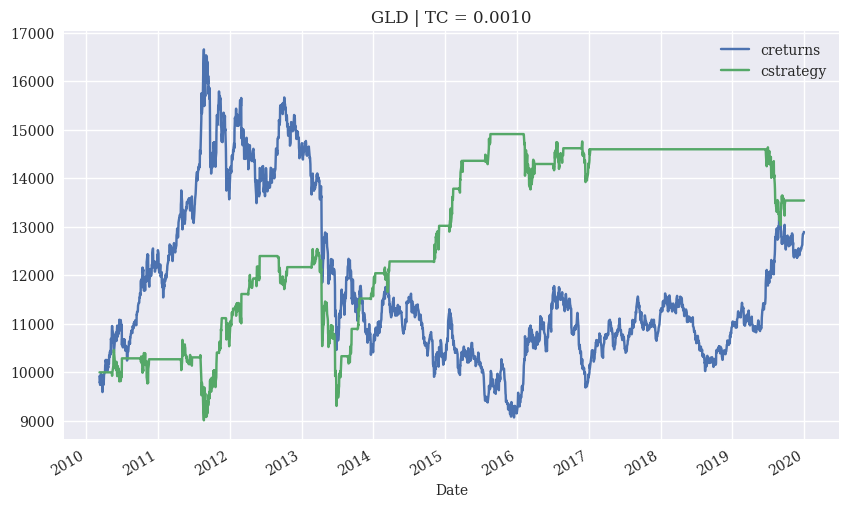

In [96]:
mrbt.plot_results()